In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

house = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

In [2]:
y = house['saleprice']
X = house[['grlivarea', 'totalbsmtsf', 'fullbath', 'halfbath', 'overallqual', 'overallcond', 'yearbuilt', 'garagearea']]

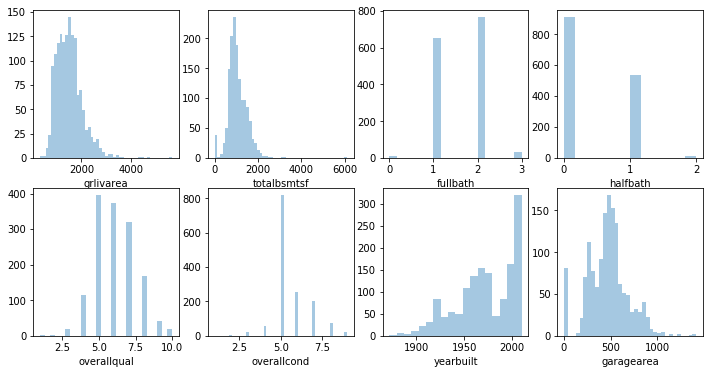

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
count=1
for x in X:
    plt.subplot(2,4,count)
    count += 1
    sns.distplot(house[x], kde=False)

plt.show()

In [15]:
import statsmodels.api as sm

X = sm.add_constant(X)

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

score = cross_val_score(lr, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: 0.76 (+/- 0.13)


In [33]:
from scipy.stats import zscore
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')

XX = X.apply(zscore)
XX = XX.iloc[:,1:]

score = cross_val_score(knn, XX, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: 0.82 (+/- 0.08)
